# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [30]:
# Code Here
!pip install palmerpenguins
from palmerpenguins import load_penguins
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [31]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [32]:
penguins = penguins.dropna()

In [33]:
X = penguins.drop('bill_depth_mm', axis = 1)
y = penguins['bill_depth_mm']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [35]:
from sklearn.compose import ColumnTransformer

ct1 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex"]),
    ("standardize", StandardScaler(), ["flipper_length_mm"])
  ],
  remainder = "drop" #Anything that isnt in the columns Bldg Type, Gr Liv Area, TotRms AbvGrd you drop all the other columns in the dataframe.
)


lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("linear_regression", LinearRegression())]
)

pipeline1_fit = lr_pipeline.fit(X_train, y_train)

In [36]:
test_predict_2var = pipeline1_fit.predict(X_test)
train_predict_2var = pipeline1_fit.predict(X_train)

In [37]:
testMSE_2var = mean_squared_error(y_test, test_predict_2var)
testMSE_2var

1.5441727047874811

In [38]:
trainMSE_2var = mean_squared_error(y_train, train_predict_2var)
trainMSE_2var

1.4293157346181602

In [39]:
ct1 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex"]),
    ("standardize", StandardScaler(), ["flipper_length_mm", "body_mass_g"])
  ],
  remainder = "drop" #Anything that isnt in the columns Bldg Type, Gr Liv Area, TotRms AbvGrd you drop all the other columns in the dataframe.
)


lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("linear_regression", LinearRegression())]
)

pipeline1_fit = lr_pipeline.fit(X_train, y_train)

In [40]:
test_predict_3var = pipeline1_fit.predict(X_test)
train_predict_3var = pipeline1_fit.predict(X_train)

In [41]:
testMSE_3var = mean_squared_error(y_test, test_predict_3var)
testMSE_3var

1.4025048755464096

In [42]:
trainMSE_3var = mean_squared_error(y_train, train_predict_3var)
trainMSE_3var

1.310805119893637

In [43]:
ct1 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex", "species"]),
    ("standardize", StandardScaler(), ["flipper_length_mm", "body_mass_g"])
  ],
  remainder = "drop" #Anything that isnt in the columns Bldg Type, Gr Liv Area, TotRms AbvGrd you drop all the other columns in the dataframe.
)


lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("linear_regression", LinearRegression())]
)

pipeline1_fit = lr_pipeline.fit(X_train, y_train)

In [44]:
test_predict_4var = pipeline1_fit.predict(X_test)
train_predict_4var = pipeline1_fit.predict(X_train)

In [45]:
testMSE_4var = mean_squared_error(y_test, test_predict_4var)
testMSE_4var

0.659127696836297

In [46]:
trainMSE_4var = mean_squared_error(y_train, train_predict_4var)
trainMSE_4var

0.6133647371211469

In [47]:
ct1 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex", "species", "island"]),
    ("standardize", StandardScaler(), ["flipper_length_mm", "body_mass_g", "bill_length_mm"])
  ],
  remainder = "drop" #Anything that isnt in the columns Bldg Type, Gr Liv Area, TotRms AbvGrd you drop all the other columns in the dataframe.
)


lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("linear_regression", LinearRegression())]
)

pipeline1_fit = lr_pipeline.fit(X_train, y_train)

In [48]:
test_predict_ALLvar = pipeline1_fit.predict(X_test)
train_predict_ALLvar = pipeline1_fit.predict(X_train)

In [49]:
testMSE_ALLvar = mean_squared_error(y_test, test_predict_ALLvar)
testMSE_ALLvar

0.6537095702986746

In [50]:
trainMSE_ALLvar = mean_squared_error(y_train, train_predict_ALLvar)
trainMSE_ALLvar

0.6029778974549559

PLOT...

In [51]:
df_errors = []
df_errors.append({
    "Model" : 2,
    "Train MSE" : trainMSE_2var,
    "Test MSE" : testMSE_2var,
})
df_errors

[{'Model': 2, 'Train MSE': 1.4293157346181602, 'Test MSE': 1.5441727047874811}]

In [52]:
df_errors.append({
    "Model" : 3,
    "Train MSE" : trainMSE_3var,
    "Test MSE" : testMSE_3var,
})
df_errors

[{'Model': 2, 'Train MSE': 1.4293157346181602, 'Test MSE': 1.5441727047874811},
 {'Model': 3, 'Train MSE': 1.310805119893637, 'Test MSE': 1.4025048755464096}]

In [53]:
df_errors.append({
    "Model" : 4,
    "Train MSE" : trainMSE_4var,
    "Test MSE" : testMSE_4var,
})
df_errors

[{'Model': 2, 'Train MSE': 1.4293157346181602, 'Test MSE': 1.5441727047874811},
 {'Model': 3, 'Train MSE': 1.310805119893637, 'Test MSE': 1.4025048755464096},
 {'Model': 4, 'Train MSE': 0.6133647371211469, 'Test MSE': 0.659127696836297}]

In [54]:
df_errors.append({
    "Model" : 6,
    "Train MSE" : trainMSE_ALLvar,
    "Test MSE" : testMSE_ALLvar,
})
df_errors

[{'Model': 2, 'Train MSE': 1.4293157346181602, 'Test MSE': 1.5441727047874811},
 {'Model': 3, 'Train MSE': 1.310805119893637, 'Test MSE': 1.4025048755464096},
 {'Model': 4, 'Train MSE': 0.6133647371211469, 'Test MSE': 0.659127696836297},
 {'Model': 6, 'Train MSE': 0.6029778974549559, 'Test MSE': 0.6537095702986746}]

In [55]:
df_errors = pd.DataFrame(df_errors)
df_errors

,Model,Train MSE,Test MSE
0,2,1.429316,1.544173
1,3,1.310805,1.402505
2,4,0.613365,0.659128
3,6,0.602978,0.653710


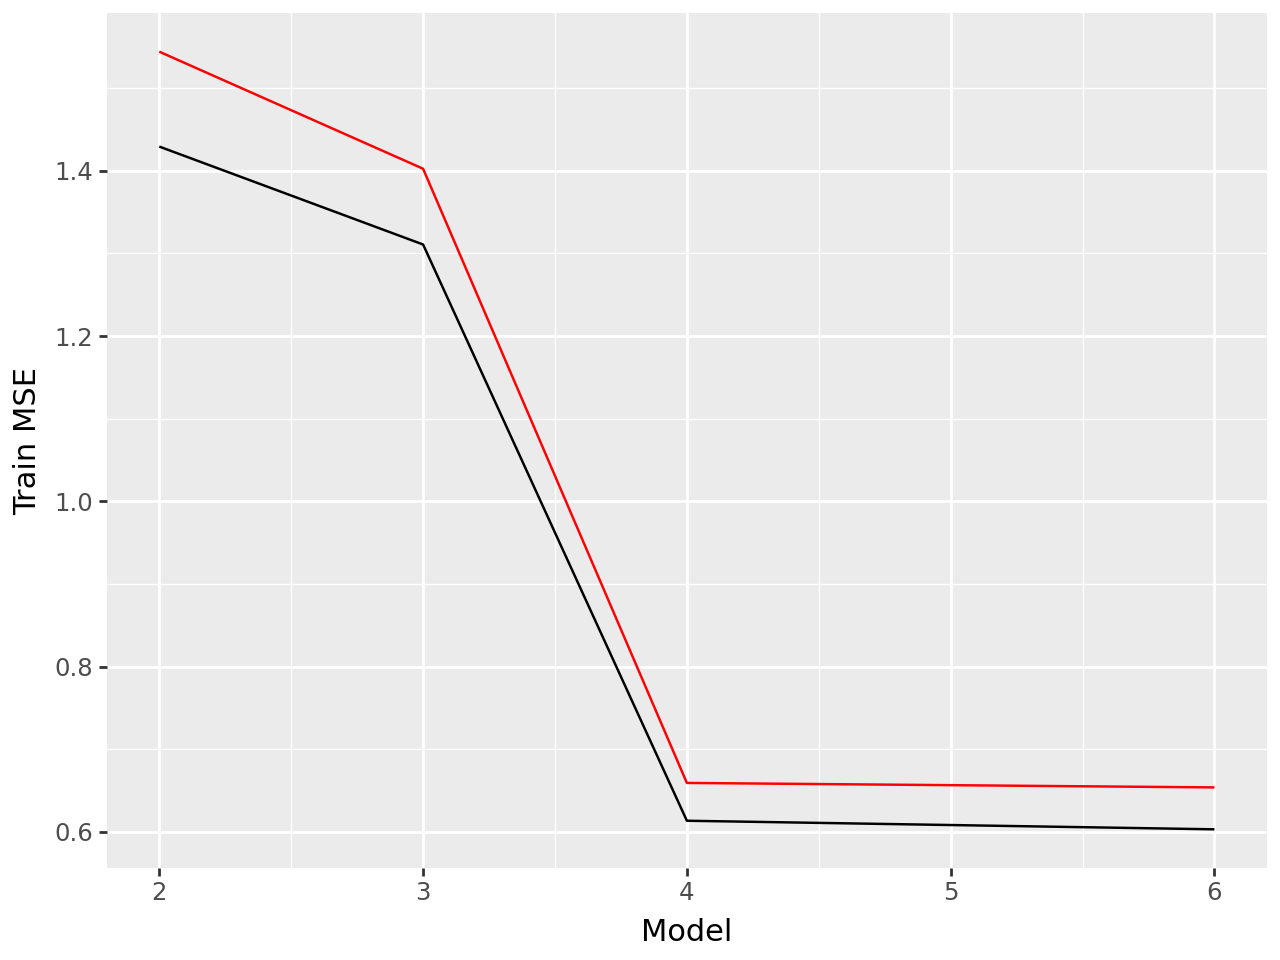

In [56]:
#Plot a line graph with x axis "Model" and y axis "MSE" with 2 lines one for Train MSE and one for Test MSE

from plotnine import ggplot, aes, geom_line, labs

(ggplot(df_errors, aes(x='Model', y='Train MSE')) +
  geom_line() +
  geom_line(aes(y='Test MSE'), color='red'))

Based on our plot, Model 4 is the best because it has the lowest MSE